# 911 Calls EDA Project

For this project, we will be analyzing some Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).


#### As we dive deeper in this project, let's have in the back of our mind these main questions:
* Why do people call 911 ?
* When and where those calls are made ?
* What's the current trend of 911 calls ?

### Data and Setup

#### Importing Numpy and Pandas


In [216]:
import numpy as np
import pandas as pd

#### Importing Visualization libraries


In [230]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Read the dataset

In [242]:
df = pd.read_csv('911.csv')

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Lattitude    99492 non-null  float64
 1   Longitude    99492 non-null  float64
 2   desc         99492 non-null  object 
 3   Zipcode      86637 non-null  float64
 4   Title        99492 non-null  object 
 5   TimeStamp    99492 non-null  object 
 6   Township     99449 non-null  object 
 7   Address      98973 non-null  object 
 8   Dummy        99492 non-null  int64  
 9   Reason       99492 non-null  object 
 10  Description  99492 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 8.3+ MB


In [243]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


* ##### Let's rename some of the column names.

In [244]:
df.rename(columns={"lat": "Lattitude", "lng": "Longitude", "zip": "Zipcode","title": "Title",
                   "timeStamp": "TimeStamp", "twp": "Township", "addr": "Address", "e": "Dummy"},
          inplace=True)

In [259]:
#df.head()

The Title column contain information for both reason and a description of the emergency
Let's split the title by Reason and Description

In [246]:
df['Reason'] = df["Title"].apply(lambda x: x.split(":")[0])

In [247]:
df['Reason'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

<AxesSubplot:xlabel='Reason', ylabel='count'>

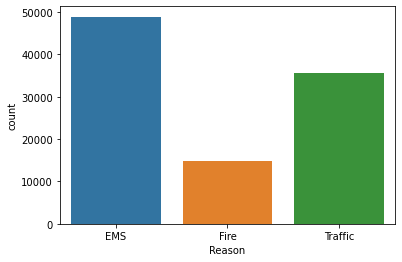

In [248]:
sns.countplot(x = "Reason", data = df)

In [249]:
df['Description']= df["Title"].apply(lambda x: x.split(":")[1])

In [250]:
df["Description"].value_counts()

 VEHICLE ACCIDENT -       23066
 DISABLED VEHICLE -        7702
 VEHICLE ACCIDENT          5573
 FIRE ALARM                5510
 RESPIRATORY EMERGENCY     5112
                          ...  
 ACTIVE SHOOTER               2
 POLICE INFORMATION           2
 SUSPICIOUS                   2
 BOMB DEVICE FOUND            1
 DISABLED VEHICLE             1
Name: Description, Length: 81, dtype: int64

In [251]:
df["Description"].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' DIZZINESS', ' HEAD INJURY',
       ' NAUSEA/VOMITING', ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT -', ' VEHICLE ACCIDENT', ' DISABLED VEHICLE -',
       ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' ALTERED MENTAL STATUS', ' FIRE ALARM',
       ' CVA/STROKE', ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN',
       ' HEMORRHAGING', ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY -', ' FEVER', ' ALLERGIC REACTION',
       ' VEH

In [257]:
pd.pivot_table(df, index = "Description", columns= "Reason")

Dummy               Lattitude                        \
Reason                    EMS Fire Traffic        EMS       Fire    Traffic   
Description                                                                   
 ABDOMINAL PAINS          1.0  NaN     NaN  40.172037        NaN        NaN   
 ACTIVE SHOOTER           1.0  NaN     NaN  40.218105        NaN        NaN   
 ALLERGIC REACTION        1.0  NaN     NaN  40.159446        NaN        NaN   
 ALTERED MENTAL STATUS    1.0  NaN     NaN  40.170834        NaN        NaN   
 AMPUTATION               1.0  NaN     NaN  40.161081        NaN        NaN   
...                       ...  ...     ...        ...        ...        ...   
 VEHICLE FIRE -           NaN  NaN     1.0        NaN        NaN  40.149842   
 VEHICLE LEAKING FUEL     NaN  1.0     NaN        NaN  40.157441        NaN   
 VEHICLE LEAKING FUEL -   NaN  NaN     1.0        NaN        NaN  40.166523   
 WARRANT SERVICE          1.0  NaN     NaN  40.204036        NaN        NaN   
 WOODS/FIELD FIRE         1.0  1.0     NaN  40.260074  40.160535        NaN   

                         Longitude                             Zipcode  \
Reason                         EMS       Fire    Traffic           EMS   
Description                                                              
 ABDOMINAL PAINS        -75.341162        NaN        NaN  19256.606352   
 ACTIVE SHOOTER         -75.188401        NaN        NaN  19272.000000   
 ALLERGIC REACTION      -75.318172        NaN        NaN  19229.756098   
 ALTERED MENTAL STATUS  -75.320302        NaN        NaN  19226.718462   
 AMPUTATION             -75.370176        NaN        NaN  19311.666667   
...                            ...        ...        ...           ...   
 VEHICLE FIRE -                NaN        NaN -75.314076           NaN   
 VEHICLE LEAKING FUEL          NaN -75.331702        NaN           NaN   
 VEHICLE LEAKING FUEL -        NaN        NaN -75.357891           NaN   
 WARRANT SERVICE        -75.430959        NaN        NaN  19249.000000   
 WOODS/FIELD FIRE       -75.490039 -75.332596        NaN  18749.500000   

                                                     
Reason                           Fire       Traffic  
Description                                          
 ABDOMINAL PAINS                  NaN           NaN  
 ACTIVE SHOOTER                   NaN           NaN  
 ALLERGIC REACTION                NaN           NaN  
 ALTERED MENTAL STATUS            NaN           NaN  
 AMPUTATION                       NaN           NaN  
...                               ...           ...  
 VEHICLE FIRE -                   NaN  19234.189840  
 VEHICLE LEAKING FUEL    19339.160714           NaN  
 VEHICLE LEAKING FUEL -           NaN  19351.262295  
 WARRANT SERVICE                  NaN           NaN  
 WOODS/FIELD FIRE        19221.135371           NaN  

[81 rows x 12 columns]

In [258]:
df.groupby(by = ["Description","Reason"]).count().unstack(level = 1)["Lattitude"]

Reason,EMS,Fire,Traffic
Description,,,
ABDOMINAL PAINS,1436.0,NaN,NaN
ACTIVE SHOOTER,2.0,NaN,NaN
ALLERGIC REACTION,438.0,NaN,NaN
ALTERED MENTAL STATUS,1386.0,NaN,NaN
AMPUTATION,14.0,NaN,NaN
...,...,...,...
VEHICLE FIRE -,NaN,NaN,553.0
VEHICLE LEAKING FUEL,NaN,73.0,NaN
VEHICLE LEAKING FUEL -,NaN,NaN,77.0


In [44]:
pd.pivot_table(df, index = "Description", columns= "Reason", values = 'e', aggfunc = sum, margins= True)

Reason,EMS,Fire,Traffic,All
Description,,,,
ABDOMINAL PAINS,1436.0,NaN,NaN,1436
ACTIVE SHOOTER,2.0,NaN,NaN,2
ALLERGIC REACTION,438.0,NaN,NaN,438
ALTERED MENTAL STATUS,1386.0,NaN,NaN,1386
AMPUTATION,14.0,NaN,NaN,14
...,...,...,...,...
VEHICLE LEAKING FUEL,NaN,73.0,NaN,73
VEHICLE LEAKING FUEL -,NaN,NaN,77.0,77
WARRANT SERVICE,2.0,NaN,NaN,2


#### Let's now investigate the timeStamp

In [264]:
df['TimeStamp'].head()

0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
2    2015-12-10 17:40:00
3    2015-12-10 17:40:01
4    2015-12-10 17:40:01
Name: TimeStamp, dtype: object

In [263]:
type(df['TimeStamp'][0])

str

TimeStamp is of type String. Let's make it a DateTime field

In [266]:
df["TimeStamp"] = pd.to_datetime(df["TimeStamp"]) #to_datetime convert the string into a datetime: yyyy-mm-dd hh:mm:ss

In [267]:
type(df['TimeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [269]:
df['TimeStamp'][0]

Timestamp('2015-12-10 17:40:00')

Let's create a column for the Month, Hour and Day of the Week of the TimeStamp

In [271]:
df["Month"] = df["TimeStamp"].apply(lambda time: time.month)

In [273]:
df["Day of Week"] = df["TimeStamp"].apply(lambda time: time.dayofweek)
df["hour"] = df["TimeStamp"].apply(lambda time: time.hour)

In [274]:
df.head()

,Lattitude,Longitude,desc,Zipcode,Title,TimeStamp,Township,Address,Dummy,Reason,Description,Month,Day of Week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,BACK PAINS/INJURY,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,DIABETIC EMERGENCY,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,GAS-ODOR/LEAK,12,3,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,CARDIAC EMERGENCY,12,3,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,DIZZINESS,12,3,17


dmap is a dictionnary that contains the days of the week. We will will use it to 
convert the Day of Week column into notation we're all familiar with

In [275]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [276]:
df["Day of Week"] = df["Day of Week"].map(dmap)

#### Visual respresentation of the number of 911 calls by Month

<AxesSubplot:xlabel='Month', ylabel='count'>

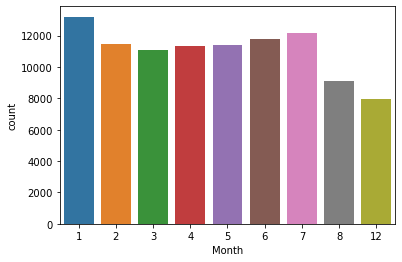

In [280]:
#Plot of call by Months
sns.countplot(x = "Month", data = df)

Noticed a significant drop of calls during the month of August, and 
we have no data for the months of September, October and November

Drill down by the Reason: hue = "Reason"

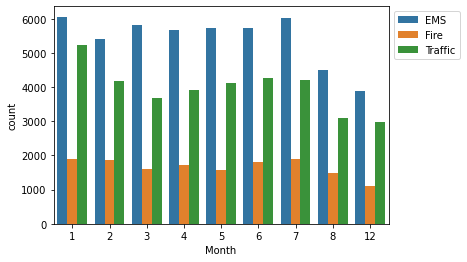

In [283]:
sns.countplot(x = "Month", data = df, hue = "Reason")
plt.legend(bbox_to_anchor = (1,1),loc = 2)

In [ ]:
#

In [106]:
#Grouping by Month
byMonth = df.groupby("Month").count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Day of Week,hour
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

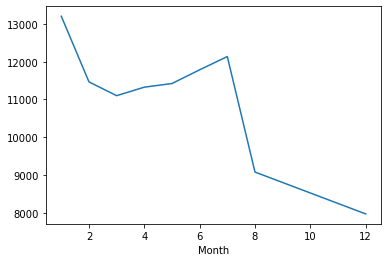

In [103]:
byMonth['lat'].plot()

In [60]:
# EMS
emsdf = df[df["Reason"] == "EMS"]
emsByMonth = emsdf.groupby("Month").count()
emsByMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Day of Week,hour
Month,,,,,,,,,,,,,
1,6063,6063,6063,5545,6063,6063,6061,6063,6063,6063,6063,0,6063
2,5413,5413,5413,4890,5413,5413,5412,5413,5413,5413,5413,0,5413
3,5832,5832,5832,5295,5832,5832,5825,5832,5832,5832,5832,0,5832
4,5680,5680,5680,5146,5680,5680,5678,5680,5680,5680,5680,0,5680
5,5734,5734,5734,5217,5734,5734,5731,5734,5734,5734,5734,0,5734
6,5720,5720,5720,5145,5720,5720,5716,5720,5720,5720,5720,0,5720
7,6029,6029,6029,5494,6029,6029,6028,6029,6029,6029,6029,0,6029
8,4508,4508,4508,4057,4508,4508,4506,4508,4508,4508,4508,0,4508
12,3898,3898,3898,3538,3898,3898,3896,3898,3898,3898,3898,0,3898


<AxesSubplot:xlabel='Month'>

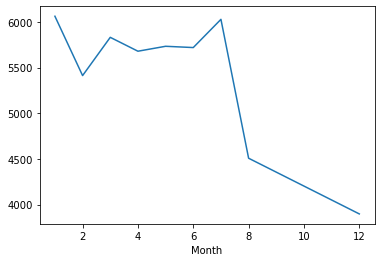

In [112]:
emsByMonth["lat"].plot()

In [117]:
# Fire
firedf = df[df["Reason"] == "Fire"]
fireByMonth = firedf.groupby("Month").count()
fireByMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Day of Week,hour
Month,,,,,,,,,,,,,
1,1905,1905,1905,1669,1905,1905,1905,1904,1905,1905,1905,1905,1905
2,1869,1869,1869,1632,1869,1869,1868,1868,1869,1869,1869,1869,1869
3,1590,1590,1590,1418,1590,1590,1589,1589,1590,1590,1590,1590,1590
4,1717,1717,1717,1494,1717,1717,1716,1717,1717,1717,1717,1717,1717
5,1573,1573,1573,1358,1573,1573,1573,1573,1573,1573,1573,1573,1573
6,1796,1796,1796,1556,1796,1796,1792,1787,1796,1796,1796,1796,1796
7,1901,1901,1901,1651,1901,1901,1898,1898,1901,1901,1901,1901,1901
8,1473,1473,1473,1274,1473,1473,1470,1469,1473,1473,1473,1473,1473
12,1096,1096,1096,960,1096,1096,1092,1095,1096,1096,1096,1096,1096


<AxesSubplot:xlabel='Month'>

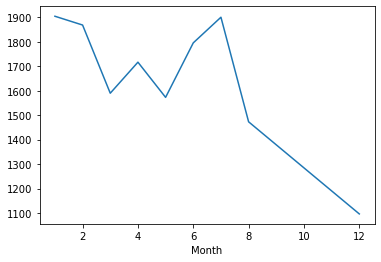

In [118]:
fireByMonth['lat'].plot()

In [116]:
# Traffic
trafficdf = df[df["Reason"] == "Traffic"]
traficByMonth = trafficdf.groupby("Month").count()
traficByMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Description,Day of Week,hour
Month,,,,,,,,,,,,,
1,5237,5237,5237,4313,5237,5237,5237,5129,5237,5237,5237,5237,5237
2,4185,4185,4185,3408,4185,4185,4185,4115,4185,4185,4185,4185,4185
3,3679,3679,3679,3042,3679,3679,3678,3638,3679,3679,3679,3679,3679
4,3929,3929,3929,3255,3929,3929,3929,3886,3929,3929,3929,3929,3929
5,4116,4116,4116,3371,4116,4116,4116,4071,4116,4116,4116,4116,4116
6,4270,4270,4270,3511,4270,4270,4269,4225,4270,4270,4270,4270,4270
7,4207,4207,4207,3488,4207,4207,4207,4161,4207,4207,4207,4207,4207
8,3097,3097,3097,2501,3097,3097,3097,3048,3097,3097,3097,3097,3097
12,2975,2975,2975,2409,2975,2975,2975,2923,2975,2975,2975,2975,2975


<AxesSubplot:xlabel='Month'>

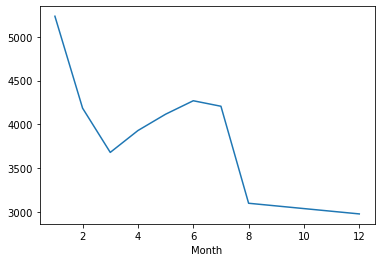

In [137]:
traficByMonth['lat'].plot()

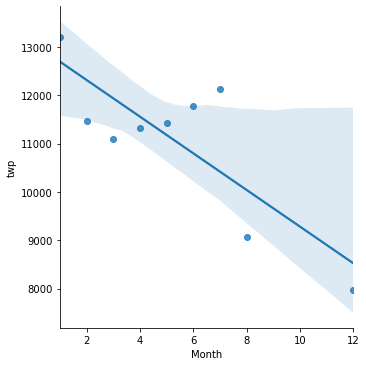

In [138]:
#linear model plot by Month
sns.lmplot(x = "Month", y = "twp", data = byMonth.reset_index())

In [291]:
#We can see that there is a significant drop in the month of august

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

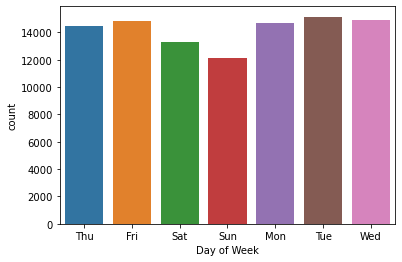

In [294]:
#Plot of call by Days of Week
sns.countplot(x = "Day of Week", data = df)

There are less 911 calls on Sunday compared to the rest of the days

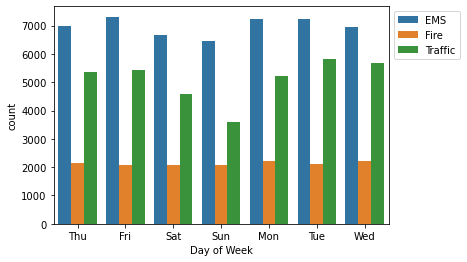

In [292]:
sns.countplot(x = "Day of Week", data = df, hue = "Reason")
plt.legend(bbox_to_anchor = (1,1),loc = 2)

In [293]:
#Grouping by Day of Week
byDayOfWeek = df.groupby("Day of Week").count()
byDayOfWeek

,Lattitude,Longitude,desc,Zipcode,Title,TimeStamp,Township,Address,Dummy,Reason,Description,Month,hour
Day of Week,,,,,,,,,,,,,
Fri,14833,14833,14833,12887,14833,14833,14830,14758,14833,14833,14833,14833,14833
Mon,14680,14680,14680,12763,14680,14680,14674,14627,14680,14680,14680,14680,14680
Sat,13336,13336,13336,11612,13336,13336,13330,13234,13336,13336,13336,13336,13336
Sun,12136,12136,12136,10558,12136,12136,12130,12095,12136,12136,12136,12136,12136
Thu,14478,14478,14478,12580,14478,14478,14474,14408,14478,14478,14478,14478,14478
Tue,15150,15150,15150,13207,15150,15150,15143,15057,15150,15150,15150,15150,15150
Wed,14879,14879,14879,13030,14879,14879,14868,14794,14879,14879,14879,14879,14879


<AxesSubplot:xlabel='Day of Week'>

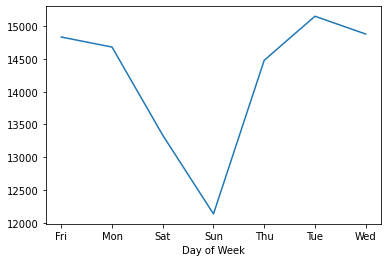

In [296]:
byDayOfWeek['Lattitude'].plot()

#### We can see that call are relatively low on Sundays compared to other days
If we were to plan agents' schedules, we might think of reducing the number of 911 agents on Sunday compared to other days

### Township Investigation

In [322]:
df["Township"]

0              NEW HANOVER
1        HATFIELD TOWNSHIP
2               NORRISTOWN
3               NORRISTOWN
4         LOWER POTTSGROVE
               ...        
99487           NORRISTOWN
99488         LOWER MERION
99489           NORRISTOWN
99490              HORSHAM
99491        UPPER GWYNEDD
Name: Township, Length: 99492, dtype: object

In [336]:
d.reset_index().rename(columns = {"index": "Township"})

,Township,Township
0,LOWER MERION,8443
1,ABINGTON,5977
2,NORRISTOWN,5890
3,UPPER MERION,5227
4,CHELTENHAM,4575
5,POTTSTOWN,4146
6,UPPER MORELAND,3434
7,LOWER PROVIDENCE,3225
8,PLYMOUTH,3158
9,HORSHAM,3003


In [337]:
pd.DataFrame(data=df["Township"].value_counts()[:10])

,Township
LOWER MERION,8443
ABINGTON,5977
NORRISTOWN,5890
UPPER MERION,5227
CHELTENHAM,4575
POTTSTOWN,4146
UPPER MORELAND,3434
LOWER PROVIDENCE,3225
PLYMOUTH,3158
HORSHAM,3003


In [353]:
#d = pd.DataFrame(data=df["Township"].value_counts()[:10])
#d.rename(columns = {"Township" : "Calls"}, inplace = True)
#d.reset_index(inplace = True)
d.rename(columns = {"index": "Township"}, inplace = True)

In [354]:
d

,Township,Calls
0,LOWER MERION,8443
1,ABINGTON,5977
2,NORRISTOWN,5890
3,UPPER MERION,5227
4,CHELTENHAM,4575
5,POTTSTOWN,4146
6,UPPER MORELAND,3434
7,LOWER PROVIDENCE,3225
8,PLYMOUTH,3158
9,HORSHAM,3003


<AxesSubplot:xlabel='Township', ylabel='Calls'>

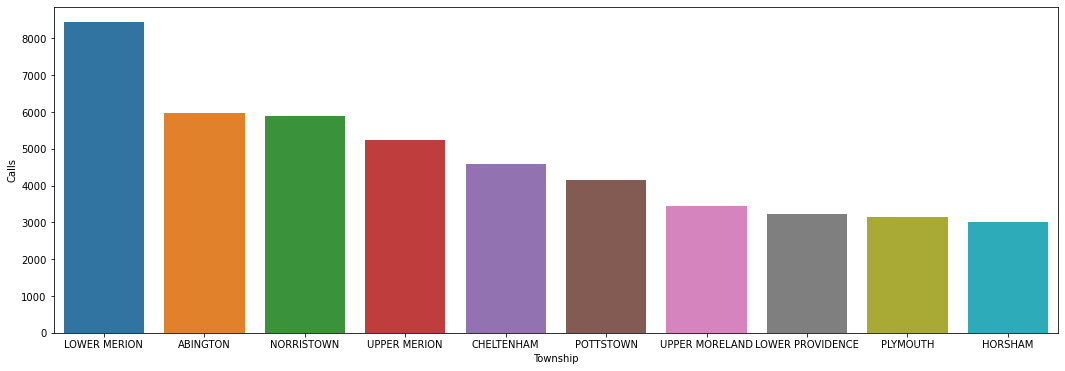

In [360]:
plt.figure(figsize = (18,6))
sns.barplot(x = "Township", y = "Calls", data = d)
#plt.tight_layout

In [301]:
df[df["Reason"]=="EMS"]['Township'].value_counts()[:10]

NORRISTOWN          3858
LOWER MERION        3171
ABINGTON            3043
POTTSTOWN           2635
CHELTENHAM          2098
UPPER MERION        2065
LOWER PROVIDENCE    2026
UPPER MORELAND      1733
HORSHAM             1324
PLYMOUTH            1274
Name: Township, dtype: int64

In [304]:
df[df["Reason"]=="Fire"]['Township'].value_counts()[:10]

LOWER MERION        1548
ABINGTON             940
NORRISTOWN           777
CHELTENHAM           674
UPPER MERION         663
POTTSTOWN            615
PLYMOUTH             442
WHITEMARSH           431
UPPER PROVIDENCE     417
LIMERICK             415
Name: Township, dtype: int64

In [303]:
df[df["Reason"]=="Traffic"]['Township'].value_counts()[:10]

LOWER MERION      3724
UPPER MERION      2499
ABINGTON          1994
CHELTENHAM        1803
PLYMOUTH          1442
HORSHAM           1315
UPPER MORELAND    1309
UPPER DUBLIN      1298
MONTGOMERY        1281
NORRISTOWN        1255
Name: Township, dtype: int64

In [140]:
#Let's now investigate the time of the day the calls happened

<AxesSubplot:xlabel='hour', ylabel='count'>

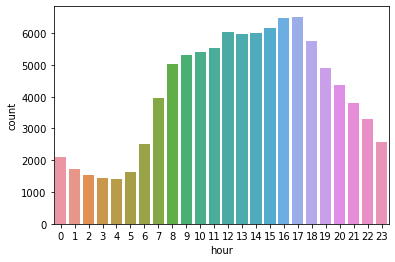

In [133]:
sns.countplot(x = "hour", data = df)

It picks around the evening between 12pm and 6pm

Let's now investigate the time frame of the call.<br>
We will create a time series graph showing the number of call every day 

For that we need to extract the date from the "TimeStamp" column which contains date and time

In [367]:
df['TimeStamp'][0].date()

datetime.date(2015, 12, 10)

In [368]:
df['Date'] = df['TimeStamp'].apply(lambda t: t.date())

In [149]:
#df["Date"]

In [369]:
dateDf = df.groupby("Date").count()
dateDf

,Lattitude,Longitude,desc,Zipcode,Title,TimeStamp,Township,Address,Dummy,Reason,Description,Month,Day of Week,hour
Date,,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389,389


<AxesSubplot:xlabel='Date'>

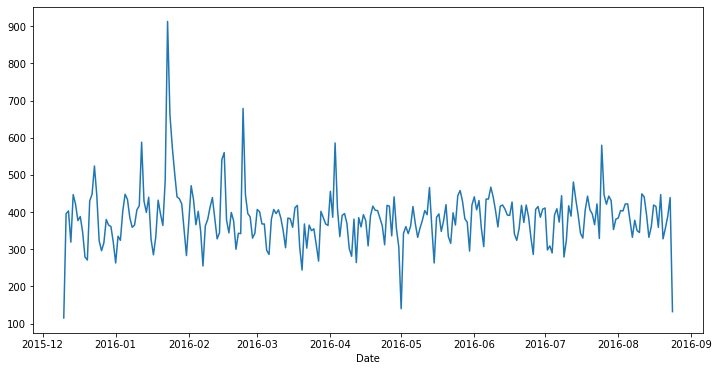

In [370]:
plt.figure(figsize=(12,6))
dateDf["Lattitude"].plot()
#plt.tight_layout(pad= 0.5)

<AxesSubplot:xlabel='Date'>

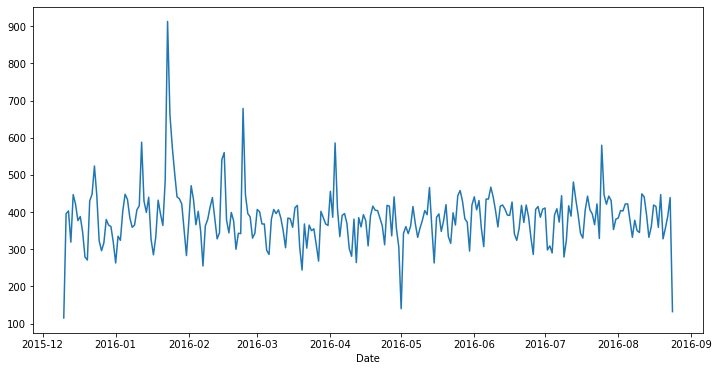

In [373]:
#Another way
fig = plt.figure(figsize = (12,6))
df.groupby("Date").count()["Lattitude"].plot()

Text(0.5, 1.0, 'EMS')

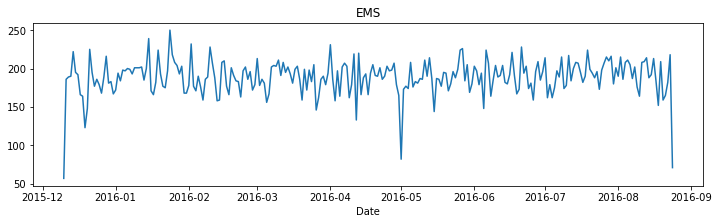

In [374]:
#Reason = EMS
fig = plt.figure(figsize = (12,3))
df[df["Reason"] == "EMS"].groupby("Date").count()["Lattitude"].plot()
plt.title("EMS")

Text(0.5, 1.0, 'Traffic')

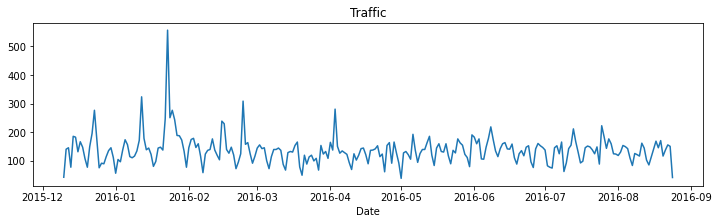

In [375]:
#Reason = Traffic
fig = plt.figure(figsize = (12,3))
df[df["Reason"] == "Traffic"].groupby("Date").count()["Lattitude"].plot()
plt.title("Traffic")

Text(0.5, 1.0, 'Fire')

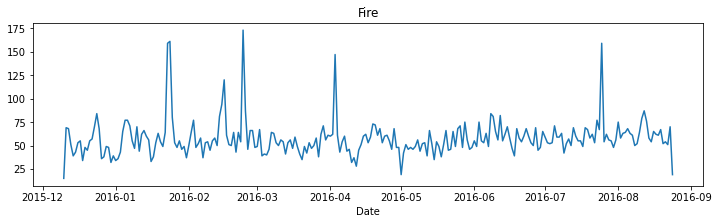

In [376]:
#Reason = Fire
fig = plt.figure(figsize = (12,3))
df[df["Reason"] == "Fire"].groupby("Date").count()["Lattitude"].plot()
plt.title("Fire")

### Now let's create a heatmap showing calls for hours and days of the week

In [377]:
df.groupby(by = ["Day of Week","hour"]).count()

Lattitude  Longitude  desc  Zipcode  Title  TimeStamp  \
Day of Week hour                                                          
Fri         0           275        275   275      248    275        275   
            1           235        235   235      200    235        235   
            2           191        191   191      165    191        191   
            3           175        175   175      164    175        175   
            4           201        201   201      184    201        201   
...                     ...        ...   ...      ...    ...        ...   
Wed         19          686        686   686      590    686        686   
            20          668        668   668      597    668        668   
            21          575        575   575      508    575        575   
            22          490        490   490      432    490        490   
            23          335        335   335      294    335        335   

                  Township  Address  Dummy  Reason  Description  Month  Date  
Day of Week hour                                                              
Fri         0          275      275    275     275          275    275   275  
            1          235      232    235     235          235    235   235  
            2          191      191    191     191          191    191   191  
            3          175      175    175     175          175    175   175  
            4          201      201    201     201          201    201   201  
...                    ...      ...    ...     ...          ...    ...   ...  
Wed         19         686      682    686     686          686    686   686  
            20         668      662    668     668          668    668   668  
            21         574      572    575     575          575    575   575  
            22         490      485    490     490          490    490   490  
            23         334      335    335     335          335    335   335  

[168 rows x 13 columns]

In [383]:
dayHour = df.groupby(by = ["Day of Week","hour"]).count().unstack(level = 1)["Reason"]

In [384]:
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='hour', ylabel='Day of Week'>

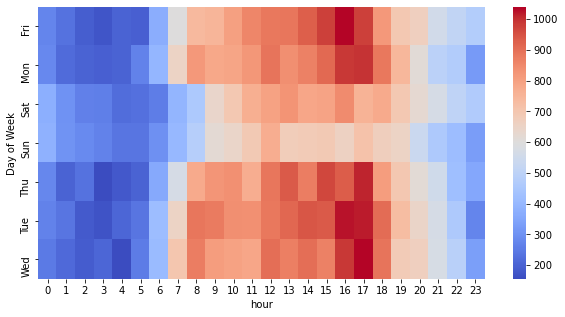

In [388]:
plt.figure(figsize = (10,5))
sns.heatmap(dayHour, cmap= "coolwarm")

In [209]:
#Now let's create a heatmap showing calls for hours and Month of the week

In [389]:
MonthHour = df.groupby(by = ["Month","hour"]).count().unstack(level = 1)["Reason"]

<AxesSubplot:xlabel='hour', ylabel='Month'>

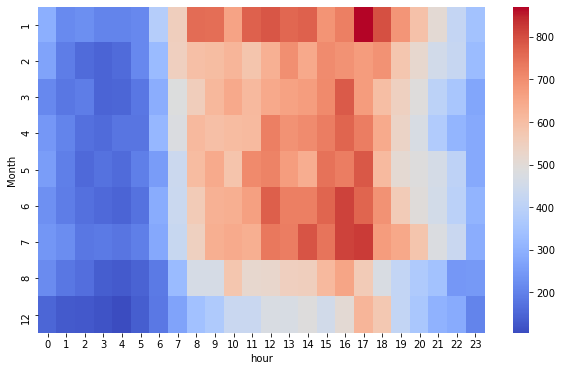

In [390]:
plt.figure(figsize = (10,6))
sns.heatmap(MonthHour, cmap = "coolwarm")

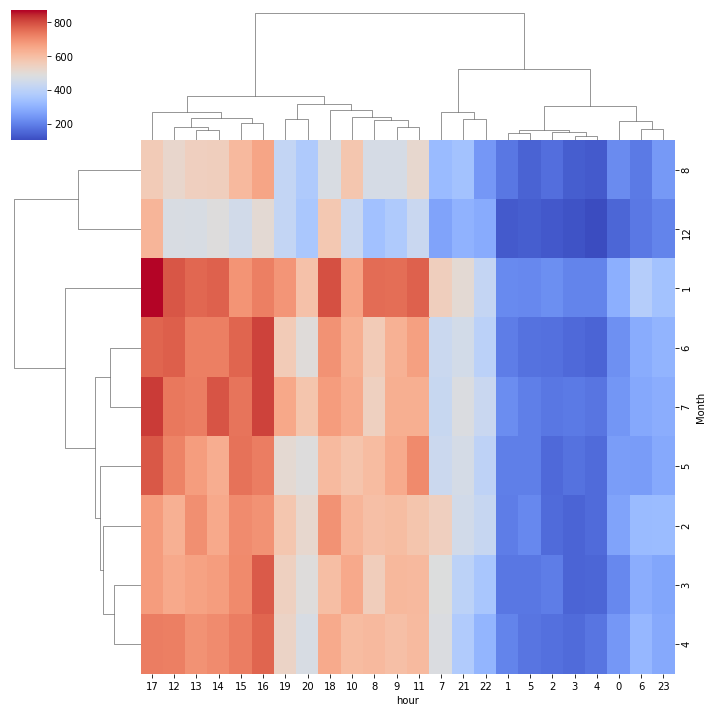

In [391]:
sns.clustermap(MonthHour, cmap = "coolwarm")